In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# excluded rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]
# transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 1. DATA CLEANSING

## 1a. Missing Values

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tidak ada Missing Values

## 1b. Duplicated Values

In [7]:
df.duplicated().sum()

0

Tidak ada Duplicated Values

# 2. PERFORM STANDARD EDA

## 2a. Statistical Summary

In [8]:
# Memisahkan data set menjadi 2, yaitu dataset number dan dataset kategori
df_categoryl = list(df.select_dtypes(include = [object]).columns)
df_numberl = list(df.select_dtypes(include = [int,float]).columns)
df_category = df[df_categoryl]
df_number = df[df_numberl]

In [9]:
df_number.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
1. Kolom SeniorCitizen merupakan nilai biner sehingga tidak perlu pengamatan lebih lanjut
2. Kolom tenure, MonthlyCharges dan TotalCharges mengindikasikan terjadinya sebaran data skew karena nilai mean dan median memiliki selisih 
3. Tidak ada yang janggal pada nilai minimum maupun nilai maksimum pada masing2 kolom

In [10]:
df_category.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observation
Customer didominasi oleh :
1. Jenis kelamin laki2
2. Tidak memiliki pasangan
3. Tidak memiliki tanggungan
4. Memiliki Telepon
5. Tidak memiliki Multiple Lines
6. Memiliki Internet Fiber Optic
7. Tidak memiliki Online Security
8. Tidak memiliki Online Backup
9. Tidak memiliki Device Protection
10. Tidak memiliki Tech Support
11. Tidak memiliki Streaming TV
12. Tidak memiliki Streaming Movies
13. Memilih Kontrak per bulan
14. Menggunakan Paperless Billing
15. Menggunakan Pembayaran Elektronik
16. Sebagian besar loyal

## 2b. Univariate Analysis

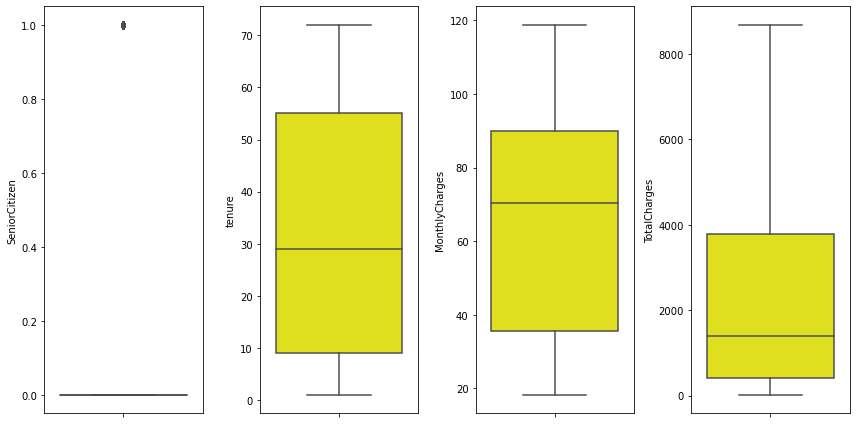

In [11]:
plt.figure(figsize=(12,6))
features = df_numberl
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='yellow')
    plt.tight_layout()

Observation:
1. Untuk kolom SeniorCitizen dapat diabaikan karena merupakan nilai biner
2. Gambar boxplot pada kolom tenure, MonthlyCharges dan TotalCharges tidak mengindikasikan adanya nilai outlier


C:\Users\azakf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\azakf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\azakf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

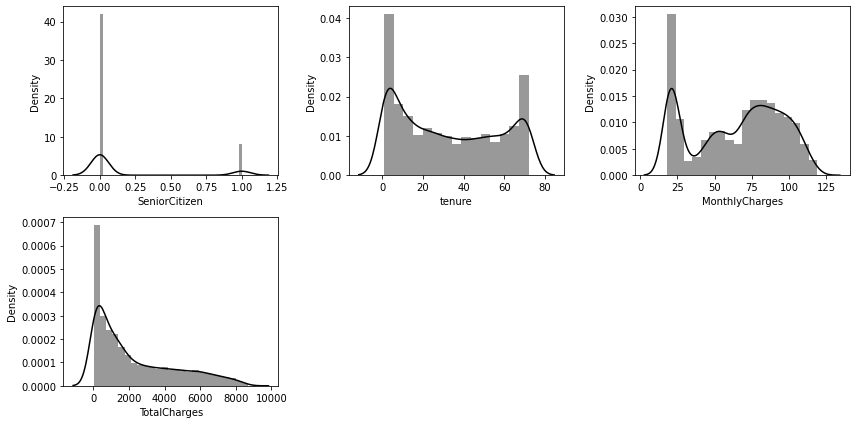

In [12]:
plt.figure(figsize=(12,6))
features = df_numberl
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=df[features[i]], color='black')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. Customer didominasi oleh Citizen yang muda
2. Sebaran data pada kolom tenure, MonthlyCharges dan TotalCharges terlihat skew

## 2c. Multivariate Analysis

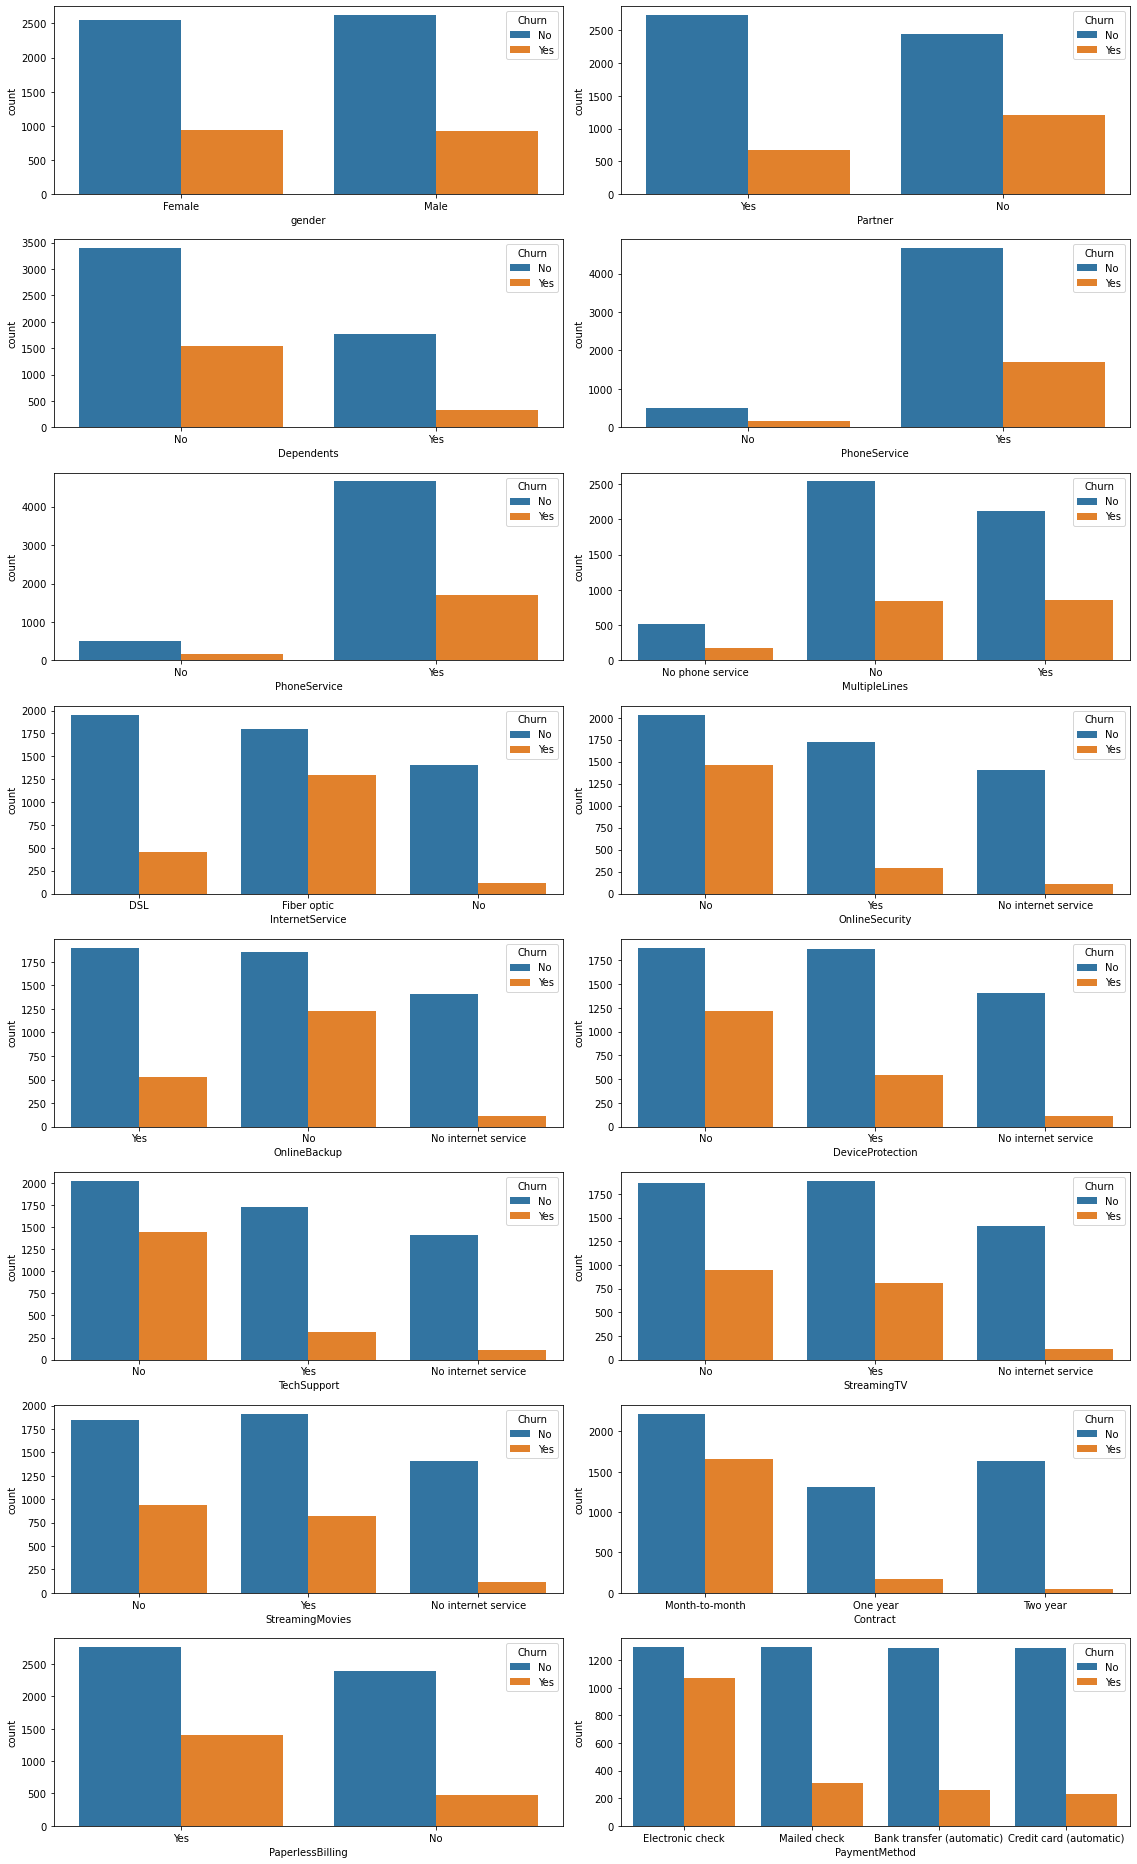

In [13]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(16,26))

sns.countplot(x="gender", hue="Churn", data=df, ax=axes[0,0])
sns.countplot(x="Partner", hue="Churn", data=df, ax=axes[0,1])
sns.countplot(x="Dependents", hue="Churn", data=df, ax=axes[1,0])
sns.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[1,1])
sns.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[2,0])
sns.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[2,1])
sns.countplot(x="InternetService", hue="Churn", data=df, ax=axes[3,0])
sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[3,1])
sns.countplot(x="OnlineBackup", hue="Churn", data=df, ax=axes[4,0])
sns.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[4,1])
sns.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[5,0])
sns.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[5,1])
sns.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[6,0])
sns.countplot(x="Contract", hue="Churn", data=df, ax=axes[6,1])
sns.countplot(x="PaperlessBilling", hue="Churn", data=df, ax=axes[7,0])
sns.countplot(x="PaymentMethod", hue="Churn", data=df, ax=axes[7,1])
plt.tight_layout()
plt.show()

Observation

Customer Churn berdasarkan countplot didominasi oleh :

1. Jenis kelamin tidak terlalu berpengaruh
2. Tidak memiliki pasangan
3. Tidak memiliki tanggungan
4. Memiliki Telepon
5. Tidak memiliki Multiple Lines
6. Memiliki Internet Fiber Optic
7. Tidak memiliki Online Security
8. Tidak memiliki Online Backup
9. Tidak memiliki Device Protection
10. Tidak memiliki Tech Support
11. Tidak memiliki Streaming TV
12. Tidak memiliki Streaming Movies
13. Memilih Kontrak per bulan
14. Menggunakan Paperless Billing
15. Menggunakan Pembayaran Elektronik

<AxesSubplot:>

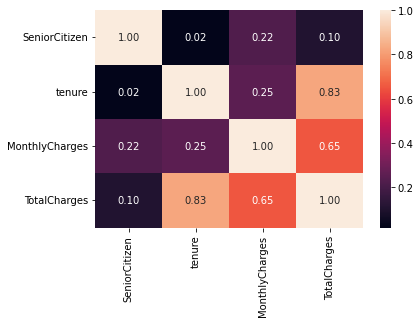

In [14]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
    
    1. tenure mempunyai korelasi kuat dengan TotalCharges
    2. MonthlyCharges mempunyai korelasi dengan TotalCharges namun tidak sekuat korelasi antara tenure dengan TotalCharges

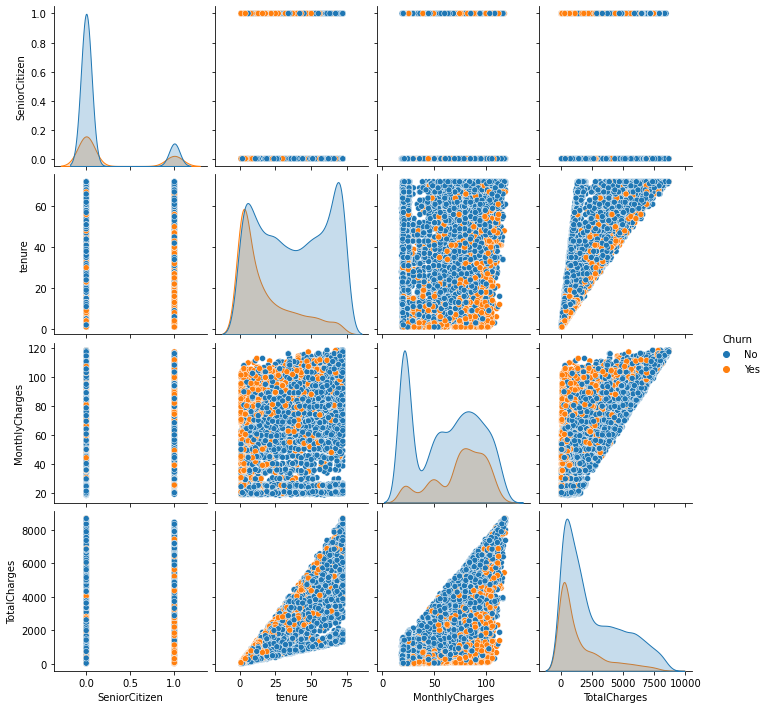

In [15]:
# pairplot of the data
sns.pairplot(df, hue='Churn')

Observation:

1. Adanya hubungan linier antara tenure dengan TotalCharges untuk Customer Churn 
2. Customer Churn memiliki tenure, MonthlyCharges dan TotalCharges yang lebih rendah

# 3. EDA QUESTIONS

## 3.1 Top 10 Jumlah TotalCharges tertinggi berdasarkan tenure dan Contract?

In [83]:
z = df.groupby(['tenure','Contract']).agg(
    sum_TotalCharges = ('TotalCharges','sum'))
z2 = z.apply(lambda x: x.sort_values(ascending=False).head(10))
z2

,,sum_TotalCharges
tenure,Contract,
72,Two year,1966099.35
71,Two year,683661.60
70,Two year,452122.60
68,Two year,310789.40
69,Two year,302132.20
67,Two year,236298.05
66,One year,201357.15
67,One year,193916.35
65,Two year,189433.50


Observation:
1. Customer dengan jangka waktu 72 dan durasi kontrak per 2 tahun menghasilkan pendapatan tertinggi 
2. Target marketing bisa fokus kepada Customer dengan durasi kontrak per 2 tahun karena lebih menguntungkan

## 3.2 Berapa persentase Customer churn dan MonthlyCharges churn?

In [112]:
y = df['MonthlyCharges'].sum()
v = df['customerID'].count()
x = df[df['Churn']=='Yes']
MonthlyCharges_Churn = x['MonthlyCharges'].sum()
Customer_Churn = x['customerID'].count()

print("Jumlah Customer Churn =", Customer_Churn, "atau",(MonthlyCharges_Churn/y*100).round(),"persen dari total customer" )
print("Jumlah MonthlyCharges Churn =", MonthlyCharges_Churn, "atau",(Customer_Churn/v*100).round(),"persen dari total MonthlyCharges")

Jumlah Customer Churn = 1869 atau 31.0 persen dari total customer
Jumlah MonthlyCharges Churn = 139130.85 atau 27.0 persen dari total MonthlyCharges


Observation:

1. Persentase customer churn sebesar 31% dan MonthlyCharges Churn sebesar 27% 
2. Butuh tindaklanjut agar presentase tersebut dapat turun (contoh: pemberian diskon/promo)